## CERTIDEAL Notebook #2 - Clustering

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### Import modules requiered

First of all, we need to import the required module. 

In [3]:
%load_ext autoreload

In [4]:
import pandas as pd
import numpy as np
import sklearn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

For this particular project, we'll work with two `scikit-learn` modules: `Kmeans` and `PCA`. They will allow us to perform a clustering algorithm and dimensionality reduction.

In [6]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [8]:
import seaborn as sns
%matplotlib inline

In [9]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import extra_graphs
import plotly.express as px
from matplotlib import animation

In [10]:
def plot_corr(df):
    """ Compute the corelation matrix in half box"""
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
def plot_tsne(tnse_data, kmeans_labels):
    """ Plot t-SNE Graph"""
    df_tsne = pd.DataFrame(tsne_data).rename({0: 'x', 1: 'y'}, axis=1)
    df_tsne['z'] = kmeans_labels
    sns.scatterplot(x=df_tsne.x, y=df_tsne.y, hue=df_tsne.z, palette="Set3")
    plt.show()
    
def prepare_pca(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix

def prepare_tsne(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = TSNE(n_components=n_components, perplexity=14).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix

def plot_3d(df, name='labels'):
    """ Plot in 3D"""
    iris = px.data.iris()
    fig = px.scatter_3d(df, x='x', y='y', z='z',
                  color=name, opacity=0.5)
    

    fig.update_traces(marker=dict(size=3))
    fig.show()
    
def plot_animation(df, label_column, name):
    def update(num):
        ax.view_init(200, num)

    N=360
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(tsne_3d_df['x'], tsne_3d_df['y'], tsne_3d_df['z'], c=tsne_3d_df[label_column],
               s=6, depthshade=True, cmap='Paired')
    ax.set_zlim(-15, 25)
    ax.set_xlim(-20, 20)
    plt.tight_layout()
    ani = animation.FuncAnimation(fig, update, N, blit=False, interval=50)
    ani.save('{}.gif'.format(name), writer='imagemagick')
    plt.show()
    
def statistics(variable):
    """ Compute Mean, Standard Deviation, Median, and Variance for each feature"""
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

def graph_histo(x,b):
    """ PLot Histogramme with b number of bins"""
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = b
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the histplot
       

        sns.histplot(x, bins=size_bins, kde=True, 
             edgecolor="grey", linewidth=1.5, alpha=0.4, color=color_bar)


        

        

        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

pd.set_option('display.max_colwidth',None)
%matplotlib inline

def display_all(df):
    """ Display up to 70 columns and 1000 rows"""
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 70): 
        display(df)


# 1. Read data into a DataFrame & Shape the Dataframe

We read the cleaned  data stored in the df_15s_m_cleaned csv file from notebook #1 into a `DataFrame` using pandas. 

In [11]:
data = pd.read_csv('/Users/bcoquard/Python lesson/Notebooks/Project Mission Certideal/df_15s_m_cleaned.csv')
           

In [12]:
data.head(20)

Source/Medium  id_customer  Nbre_Transac_by_Cust  \
0   (direct) / (none)         3807                     1   
1   (direct) / (none)         5066                     1   
2   (direct) / (none)         5763                     1   
3   (direct) / (none)         7653                     1   
4   (direct) / (none)         8040                     1   
5   (direct) / (none)         8718                     1   
6   (direct) / (none)         9103                     1   
7   (direct) / (none)        11392                     1   
8   (direct) / (none)        12467                     1   
9   (direct) / (none)        13303                     1   
10  (direct) / (none)        13812                     1   
11  (direct) / (none)        14203                     1   
12  (direct) / (none)        15096                     1   
13  (direct) / (none)        15101                     1   
14  (direct) / (none)        16065                     1   
15  (direct) / (none)        16878                     1   
16  (direct) / (none)        16902                     1   
17  (direct) / (none)        18812                     1   
18  (direct) / (none)        19950                     1   
19  (direct) / (none)        21314                     1   

                              series of payment  has_discount  \
0                          PayPal,PayPal,PayPal             1   
1                         Carte bleu,Carte bleu             0   
2                               Cetelem,Cetelem             0   
3                         Carte bleu,Carte bleu             1   
4                               Cetelem,Cetelem             0   
5              Carte bleu,Carte bleu,Carte bleu             0   
6                         Carte bleu,Carte bleu             1   
7   Carte bleu,Carte bleu,Carte bleu,Carte bleu             1   
8                                    Carte bleu             0   
9              Carte bleu,Carte bleu,Carte bleu             0   
10                                      Cetelem             0   
11                        Carte bleu,Carte bleu             1   
12                                   Carte bleu             1   
13                              Cetelem,Cetelem             0   
14             Carte bleu,Carte bleu,Carte bleu             1   
15                        Carte bleu,Carte bleu             0   
16                              Cetelem,Cetelem             0   
17                              Cetelem,Cetelem             1   
18                        Carte bleu,Carte bleu             1   
19                        Carte bleu,Carte bleu             0   

    total_discounts  total_delivery  num_transactions_LY  spent_money_LY  \
0              30.0            10.5                    3          888.42   
1               0.0             7.0                    2          426.78   
2               0.0             5.0                    2         1030.80   
3              30.0             5.0                    2          734.78   
4               0.0             7.0                    2          636.78   
5               0.0            10.5                    3          687.45   
6              30.0             3.8                    2          969.58   
7              60.0             7.6                    4          881.12   
8               0.0             1.9                    1          283.90   
9               0.0            10.5                    3          688.44   
10              0.0             5.7                    3          620.67   
11             20.0             5.0                    2          570.78   
12             15.0             3.5                    1          294.49   
13              0.0             5.0                    2         1167.58   
14             30.0            10.5                    3          834.42   
15              0.0             7.0                    2          766.78   
16              0.0             5.0                    2          894.78   
17           

## Shaping the Dataset to filter on Source/Medium Channel

### Dropping useless columns

In [13]:
data.drop(['id_customer', 'series of payment','Lst Product Purchased',
              'multiple_payment_methods','has_different_products_purchased','payment'], axis=1, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42040 entries, 0 to 42039
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Source/Medium                              42040 non-null  object 
 1   Nbre_Transac_by_Cust                       42040 non-null  int64  
 2   has_discount                               42040 non-null  int64  
 3   total_discounts                            42040 non-null  float64
 4   total_delivery                             42040 non-null  float64
 5   num_transactions_LY                        42040 non-null  int64  
 6   spent_money_LY                             42040 non-null  float64
 7   num_transactions_LT                        42040 non-null  int64  
 8   spent_money_LT                             42040 non-null  float64
 9    Nbr_channel_used                          42040 non-null  int64  
 10  time_between_first_and

In [15]:
df = data.groupby('Source/Medium').agg({'Nbre_Transac_by_Cust': 'mean',
                                                  'total_discounts': 'mean',
                                                  'total_delivery': 'mean',
                                                  'num_transactions_LY': 'mean',
                                                  'spent_money_LY': 'mean',
                                                  'num_transactions_LT': 'mean',
                                                  'spent_money_LT': 'mean',
                                                  ' Nbr_channel_used': 'mean',
                                                  'time_between_first_and_second_order': 'mean',
                                                  'has_discount': 'sum',
                                                  'Multi Purchased with Accessories/Services': 'sum'}).round(2)

df.reset_index(inplace=True)

In [16]:
df

Source/Medium  Nbre_Transac_by_Cust  total_discounts  \
0             (direct) / (none)                  1.04            12.94   
1              Ecosia / organic                  1.02            13.14   
2                    bing / cpc                  1.03            13.97   
3                bing / organic                  1.03            14.40   
4          comparateur / kelkoo                  1.01            11.37   
5              criteo / display                  1.00            14.01   
6      customer.io / behavioral                  1.01            14.43   
7      customer.io / newsletter                  1.02            16.71   
8   customer.io / transactional                  1.02            11.40   
9          effinity / affiliate                  1.04            14.06   
10               facebook / cpa                  1.00             8.03   
11                 google / cpc                  1.05            12.93   
12             google / organic                  1.03            13.53   
13        lemonde.fr / referral                  1.00            17.24   
14        radins.com / referral                  1.01             9.81   

    total_delivery  num_transactions_LY  spent_money_LY  num_transactions_LT  \
0             6.28                 2.32          823.88                 3.35   
1             6.00                 2.36          824.27                 3.19   
2             6.15                 2.31          804.16                 3.19   
3             5.99                 2.26          830.76                 3.19   
4             6.42                 2.29          834.04                 3.12   
5             5.53                 2.10          702.36                 2.94   
6             6.27                 2.32          840.56                 2.74   
7             6.22                 2.33          733.82                 4.65   
8             6.02                 2.21          736.67                 3.28   
9             6.06                 2.32          842.29                 2.99   
10            7.05                 2.40          819.50                 2.94   
11            6.50                 2.41          841.57                 3.19   
12            6.27                 2.34          837.66                 3.16   
13            6.85                 2.41          910.43                 3.11   
14            6.09                 2.23          796.23                 3.01   

    spent_money_LT   Nbr_channel_used  time_between_first_and_second_order  \
0          1089.78               2.26                                 8.38   
1          1023.51               2.34                                 2.96   
2          1028.29               2.29                                 5.47   
3          1070.98               2.25                                 5.88   
4          1047.12               2.23                                 7.21   
5           904.97               2.07                                 9.69   
6           942.39               2.27                                 4.28   
7          1312.49               2.28                                13.06   
8          1018.71               2.13                                 5.41   
9          1030.63               2.28                                 6.74   
10          964.28               2.33                                 5.09   
11         1045.75               2.36                                 5.10   
12         1051.84               2.30                                 6.93   
13         1095.84               2.35                                 7.43   
14          996.80               2.21                                 8.06   

    has_discount  Multi Purchased with Accessories/Services  
0           1808                                       3303  
1             60                                        128  
2            957                                       1808  
3            134                                       

In [17]:
data.describe()

Nbre_Transac_by_Cust  has_discount  total_discounts  total_delivery  \
count          42040.000000  42040.000000     42040.000000    42040.000000   
mean               1.041698      0.482969        13.225360        6.354282   
std                0.209318      0.524021        15.906692        2.846134   
min                1.000000      0.000000         0.000000        1.900000   
25%                1.000000      0.000000         0.000000        5.000000   
50%                1.000000      0.000000         0.000000        5.700000   
75%                1.000000      1.000000        30.000000        7.000000   
max                5.000000      5.000000       165.000000       42.000000   

       num_transactions_LY  spent_money_LY  num_transactions_LT  \
count         42040.000000    42040.000000         42040.000000   
mean              2.362084      832.993832             3.196028   
std               0.847606      472.532703             2.090461   
min               1.000000        9.900000             1.000000   
25%               2.000000      515.580000             2.000000   
50%               2.000000      728.780000             2.000000   
75%               3.000000     1033.902500             4.000000   
max              12.000000     5760.720000            40.000000   

       spent_money_LT   Nbr_channel_used  time_between_first_and_second_order  \
count    42040.000000       42040.000000                         42040.000000   
mean      1050.797854           2.316294                             6.151118   
std        663.326142           0.770005                            31.901978   
min         39.000000           1.000000                             0.000000   
25%        612.780000           2.000000                             0.000000   
50%        876.780000           2.000000                             0.000000   
75%       1304.445000           3.000000                             0.000000   
max       9778.080000          12.000000                           351.000000   

       Multi Purchased with Accessories/Services  
count                               42040.000000  
mean                                    0.928378  
std                                     0.257864  
min                                     0.000000  
25%                                     1.000000  
50%                                     1.000000  
75%                                     1.000000  
max                                     1.000000

#### Add 2 new columns with the % of sales with accessories/service and % of sales with discount

In [18]:
data.groupby("Source/Medium")["Nbre_Transac_by_Cust"].sum()

Source/Medium
(direct) / (none)               3849
Ecosia / organic                 137
bing / cpc                      1953
bing / organic                   273
comparateur / kelkoo            1015
criteo / display                 127
customer.io / behavioral         708
customer.io / newsletter         909
customer.io / transactional      565
effinity / affiliate            4700
facebook / cpa                   109
google / cpc                   21641
google / organic                7091
lemonde.fr / referral            167
radins.com / referral            549
Name: Nbre_Transac_by_Cust, dtype: int64

In [19]:
df['Nbre_Transac']=[3849,137,1953,273,1015,127,708,909,565,4700,109,21641,7091,167,549]

#### Creating 2 new scoring features  

In [20]:
df['Score_Discount']=df['has_discount']/df['Nbre_Transac']
df['Score_Access/service']=df['Multi Purchased with Accessories/Services']/df['Nbre_Transac']

#### Numericalize 'Source/Medium' feature

In [21]:
# Créer un encodeur LabelEncoder
le = LabelEncoder()

# Appliquer l'encodeur à la colonne 'Source/Medium'

df['Source/Medium_enc'] = le.fit_transform(df['Source/Medium'])


In [22]:
df

Source/Medium  Nbre_Transac_by_Cust  total_discounts  \
0             (direct) / (none)                  1.04            12.94   
1              Ecosia / organic                  1.02            13.14   
2                    bing / cpc                  1.03            13.97   
3                bing / organic                  1.03            14.40   
4          comparateur / kelkoo                  1.01            11.37   
5              criteo / display                  1.00            14.01   
6      customer.io / behavioral                  1.01            14.43   
7      customer.io / newsletter                  1.02            16.71   
8   customer.io / transactional                  1.02            11.40   
9          effinity / affiliate                  1.04            14.06   
10               facebook / cpa                  1.00             8.03   
11                 google / cpc                  1.05            12.93   
12             google / organic                  1.03            13.53   
13        lemonde.fr / referral                  1.00            17.24   
14        radins.com / referral                  1.01             9.81   

    total_delivery  num_transactions_LY  spent_money_LY  num_transactions_LT  \
0             6.28                 2.32          823.88                 3.35   
1             6.00                 2.36          824.27                 3.19   
2             6.15                 2.31          804.16                 3.19   
3             5.99                 2.26          830.76                 3.19   
4             6.42                 2.29          834.04                 3.12   
5             5.53                 2.10          702.36                 2.94   
6             6.27                 2.32          840.56                 2.74   
7             6.22                 2.33          733.82                 4.65   
8             6.02                 2.21          736.67                 3.28   
9             6.06                 2.32          842.29                 2.99   
10            7.05                 2.40          819.50                 2.94   
11            6.50                 2.41          841.57                 3.19   
12            6.27                 2.34          837.66                 3.16   
13            6.85                 2.41          910.43                 3.11   
14            6.09                 2.23          796.23                 3.01   

    spent_money_LT   Nbr_channel_used  time_between_first_and_second_order  \
0          1089.78               2.26                                 8.38   
1          1023.51               2.34                                 2.96   
2          1028.29               2.29                                 5.47   
3          1070.98               2.25                                 5.88   
4          1047.12               2.23                                 7.21   
5           904.97               2.07                                 9.69   
6           942.39               2.27                                 4.28   
7          1312.49               2.28                                13.06   
8          1018.71               2.13                                 5.41   
9          1030.63               2.28                                 6.74   
10          964.28               2.33                                 5.09   
11         1045.75               2.36                                 5.10   
12         1051.84               2.30                                 6.93   
13         1095.84               2.35                                 7.43   
14          996.80               2.21                                 8.06   

    has_discount  Multi Purchased with Accessories/Services  Nbre_Transac  \
0           1808                                       3303          3849   
1             60                                        128           137   
2            957                                       1808          195

#### Select the final features for the model¶

In [24]:
df_model=df[[  'total_delivery',
       'spent_money_LY','spent_money_LT',' Nbr_channel_used','time_between_first_and_second_order',
        'Score_Discount','Score_Access/service','Source/Medium_enc']]


In [25]:
df_model.describe().T

count         mean        std  \
total_delivery                        15.0     6.246667   0.365174   
spent_money_LY                        15.0   811.880000  52.275146   
spent_money_LT                        15.0  1041.558667  91.536446   
 Nbr_channel_used                     15.0     2.263333   0.079791   
time_between_first_and_second_order   15.0     6.779333   2.444532   
Score_Discount                        15.0     0.467852   0.078986   
Score_Access/service                  15.0     0.901810   0.044325   
Source/Medium_enc                     15.0     7.000000   4.472136   

                                            min          25%          50%  \
total_delivery                         5.530000     6.040000     6.220000   
spent_money_LY                       702.360000   800.195000   824.270000   
spent_money_LT                       904.970000  1007.755000  1030.630000   
 Nbr_channel_used                      2.070000     2.240000     2.280000   
time_between_first_and_second_order    2.960000     5.255000     6.740000   
Score_Discount                         0.293578     0.427352     0.478776   
Score_Access/service                   0.776991     0.890864     0.901847   
Source/Medium_enc                      0.000000     3.500000     7.000000   

                                             75%          max  
total_delivery                          6.350000     7.050000  
spent_money_LY                        839.110000   910.430000  
spent_money_LT                       1061.410000  1312.490000  
 Nbr_channel_used                       2.315000     2.360000  
time_between_first_and_second_order     7.745000    13.060000  
Score_Discount                          0.524525     0.588559  
Score_Access/service                    0.923330     0.981651  
Source/Medium_enc                      10.500000    14.000000

In [26]:
df_model

total_delivery  spent_money_LY  spent_money_LT   Nbr_channel_used  \
0             6.28          823.88         1089.78               2.26   
1             6.00          824.27         1023.51               2.34   
2             6.15          804.16         1028.29               2.29   
3             5.99          830.76         1070.98               2.25   
4             6.42          834.04         1047.12               2.23   
5             5.53          702.36          904.97               2.07   
6             6.27          840.56          942.39               2.27   
7             6.22          733.82         1312.49               2.28   
8             6.02          736.67         1018.71               2.13   
9             6.06          842.29         1030.63               2.28   
10            7.05          819.50          964.28               2.33   
11            6.50          841.57         1045.75               2.36   
12            6.27          837.66         1051.84               2.30   
13            6.85          910.43         1095.84               2.35   
14            6.09          796.23          996.80               2.21   

    time_between_first_and_second_order  Score_Discount  Score_Access/service  \
0                                  8.38        0.469732              0.858145   
1                                  2.96        0.437956              0.934307   
2                                  5.47        0.490015              0.925755   
3                                  5.88        0.490842              0.915751   
4                                  7.21        0.416749              0.906404   
5                                  9.69        0.535433              0.897638   
6                                  4.28        0.538136              0.920904   
7                                 13.06        0.588559              0.891089   
8                                  5.41        0.400000              0.776991   
9                                  6.74        0.513617              0.890638   
10                                 5.09        0.293578              0.981651   
11                                 5.10        0.442678              0.890255   
12                                 6.93        0.478776              0.901847   
13                                 7.43        0.562874              0.934132   
14                                 8.06        0.358834              0.901639   

    Source/Medium_enc  
0                   0  
1                   1  
2                   2  
3                   3  
4                   4  
5                   5  
6                   6  
7                   7  
8                   8  
9                   9  
10                 10  
11                 11  
12                 12  
13                 13  
14                 14

## 1.2 Data Exploration

Now, it's time to explore the data to check the quality of the data and the distribution of the variables.

First, we check that if there is any missing value in the dataset. K-means algorithm is not able to deal with missing values. 

In [27]:
print(f"Missing values in each variable: \n{df_model.isnull().sum()}")

Missing values in each variable: 
total_delivery                         0
spent_money_LY                         0
spent_money_LT                         0
 Nbr_channel_used                      0
time_between_first_and_second_order    0
Score_Discount                         0
Score_Access/service                   0
Source/Medium_enc                      0
dtype: int64


Fortunately, there is no missing data. We can also check if there are duplicated rows.

In [28]:
print(f"Duplicated rows: {df_model.duplicated().sum()}")

Duplicated rows: 0


Finally, we check how each variable is presented in the DataFrame. Categorical variables cannot be handled directly. K-means is based on distances. The approach for converting those variables depend on the type of categorical variables. 

In [29]:
print(f"Variable:                  Type: \n{df_model.dtypes}") 

Variable:                  Type: 
total_delivery                         float64
spent_money_LY                         float64
spent_money_LT                         float64
 Nbr_channel_used                      float64
time_between_first_and_second_order    float64
Score_Discount                         float64
Score_Access/service                   float64
Source/Medium_enc                        int64
dtype: object


# 2. EDA

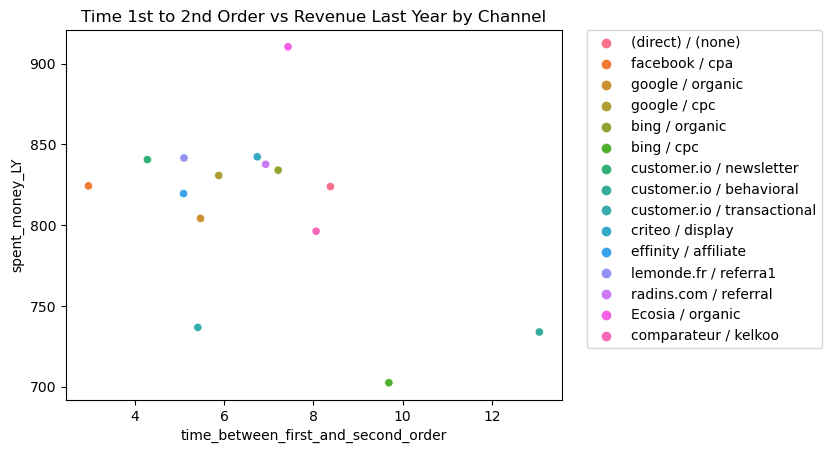

In [30]:
#Create a dictionary with the encoded Source/Value
source_medium_dict = {
    0: '(direct) / (none)',
    1: 'facebook / cpa',
    2: 'google / organic',
    3: 'google / cpc',
    4: 'bing / organic',
    5: 'bing / cpc',
    6: 'customer.io / newsletter',
    7: 'customer.io / behavioral',
    8: 'customer.io / transactional',
    9: 'criteo / display',
    10: 'effinity / affiliate',
    11: 'lemonde.fr / referra1',
    12: 'radins.com / referral',
    13: 'Ecosia / organic',
    14: 'comparateur / kelkoo'
}

# Create the scatterplot
sns.scatterplot(x='time_between_first_and_second_order',
                y='spent_money_LY', hue=source_medium_dict.values(), data=df_model,legend='full')
# Set the plot title
plt.title('Time 1st to 2nd Order vs Revenue Last Year by Channel')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


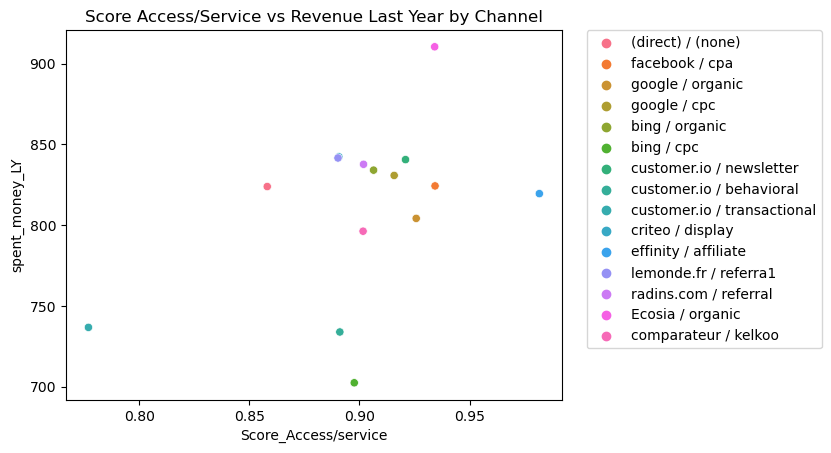

In [31]:
# Create the scatterplot
sns.scatterplot(x='Score_Access/service',
                y='spent_money_LY', hue=source_medium_dict.values(), data=df_model,legend='full')

# Set the plot title
plt.title('Score Access/Service vs Revenue Last Year by Channel')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


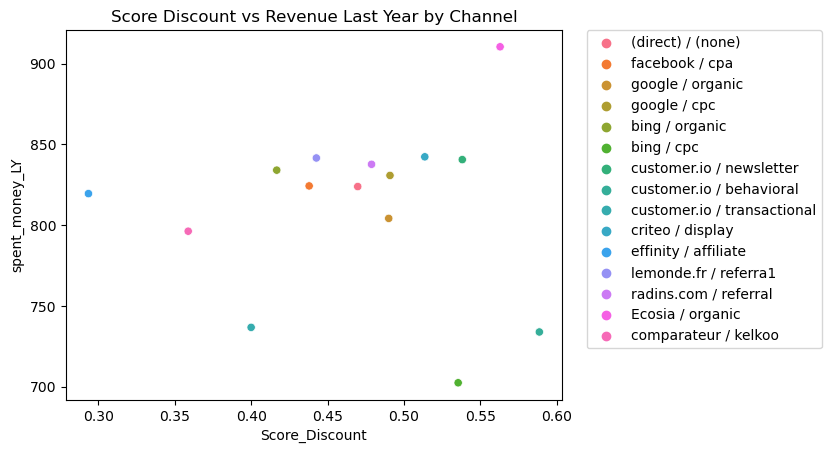

In [32]:
# Create the scatterplot
sns.scatterplot(x='Score_Discount',
                y='spent_money_LY', hue=source_medium_dict.values(), data=df_model,legend='full')
# Set the plot title
plt.title('Score Discount vs Revenue Last Year by Channel')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

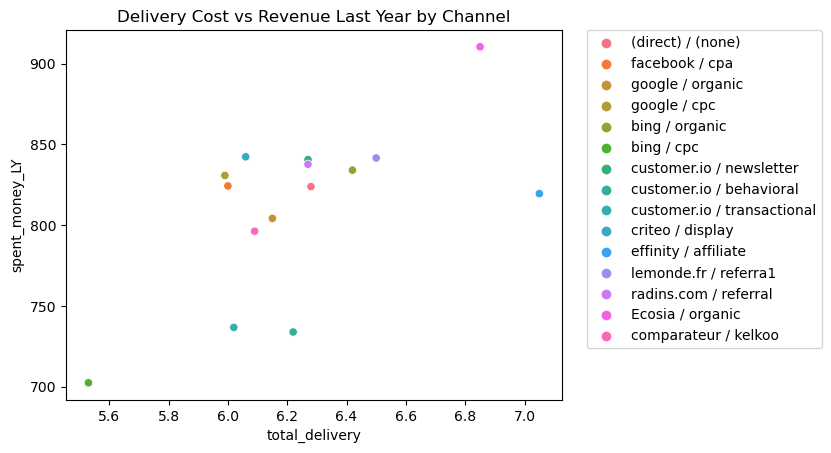

In [33]:
# Create the scatterplot
sns.scatterplot(x='total_delivery',
                y='spent_money_LY', hue=source_medium_dict.values(), data=df_model,legend='full')
# Set the plot title
plt.title('Delivery Cost vs Revenue Last Year by Channel')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

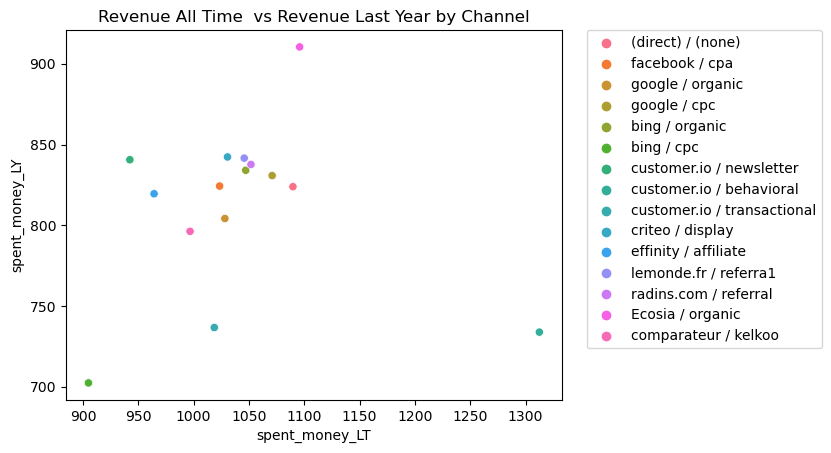

In [34]:
# Create the scatterplot
sns.scatterplot(x='spent_money_LT',
                y='spent_money_LY', hue=source_medium_dict.values(), data=df_model,legend='full')
# Set the plot title
plt.title('Revenue All Time  vs Revenue Last Year by Channel')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2.2 Plot Correlation

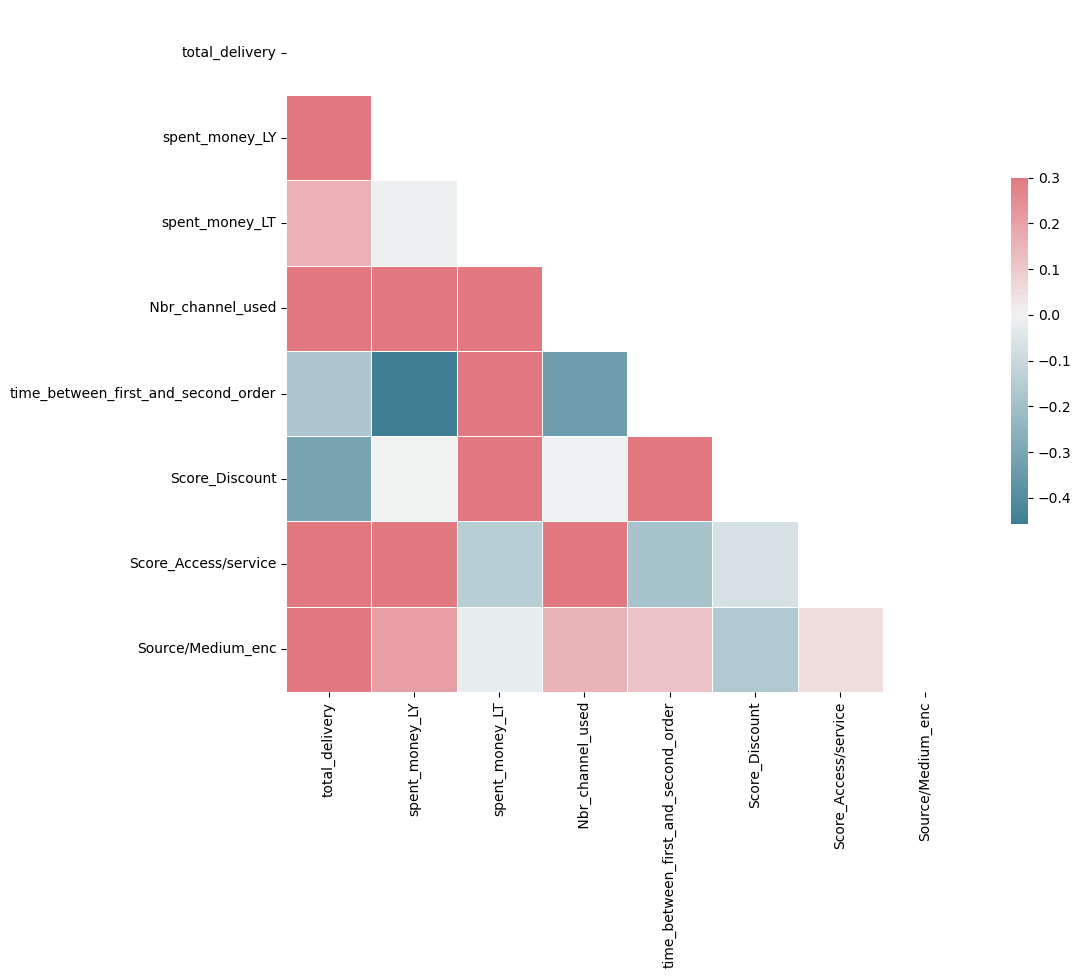

In [35]:
plot_corr(df_model)

There are  an interesting correlations between :
- time_between_first_and_second_order feature and spent_money_LY 
- time_between_first_and_second_order feature and Nre_channel_used (i.e the number of channel used byt the customer  to purchase  in one year)

**but overall not high corellations between our features**

## 2.3 Descriptive statistics and Distribution.

For the descriptive statistcs, we'll get mean, standard deviation, median and variance. If the variable is not numeric, we'll get the counts in each category.

We'll start by the **Spending Score**.

In [36]:
spending = df_model['spent_money_LY']

In [37]:
statistics(spending)

Mean  Standard Deviation  Median     Variance
Variable                                                       
spent_money_LY  811.88           50.502589  824.27  2550.511533

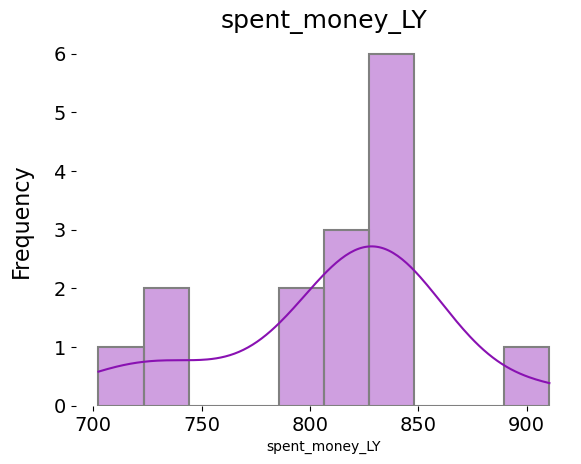

In [38]:
graph_histo(spending,10)

   **It seems that we could probably have 3 subcategory with Low/Medium/High spending**

Then, we'll check **time_between_first_and_second_order**.

In [39]:
time =  df_model['time_between_first_and_second_order']

In [40]:
statistics(time)

Mean  Standard Deviation  Median  \
Variable                                                                    
time_between_first_and_second_order  6.779333            2.361642    6.74   

                                     Variance  
Variable                                       
time_between_first_and_second_order  5.577353

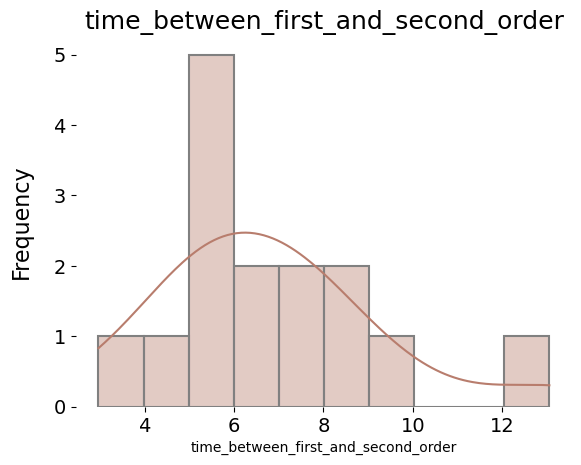

In [41]:
graph_histo(time,10)

Then , we'll explore **Score_Discount** variable.

In [42]:
Score_Discount=  df_model["Score_Discount"]

In [43]:
statistics(Score_Discount)

Mean  Standard Deviation    Median  Variance
Variable                                                        
Score_Discount  0.467852            0.076308  0.478776  0.005823

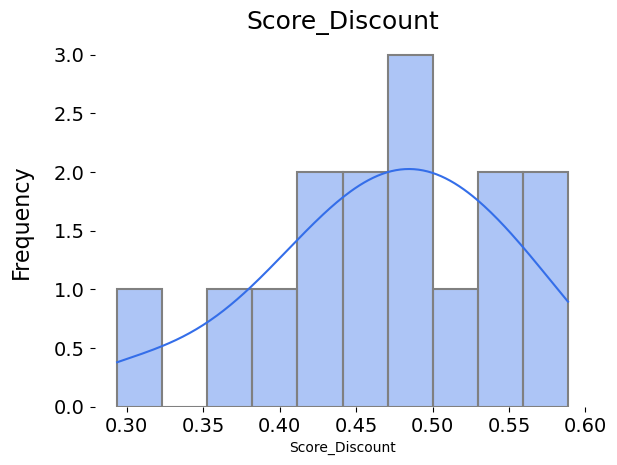

In [44]:
graph_histo(Score_Discount,10)

Then , we'll explore **Score_Access/service** variable.

In [45]:
Score_acces =  df_model["Score_Access/service"]

In [46]:
statistics(Score_acces)

Mean  Standard Deviation    Median  Variance
Variable                                                             
Score_Access/service  0.90181            0.042822  0.901847  0.001834

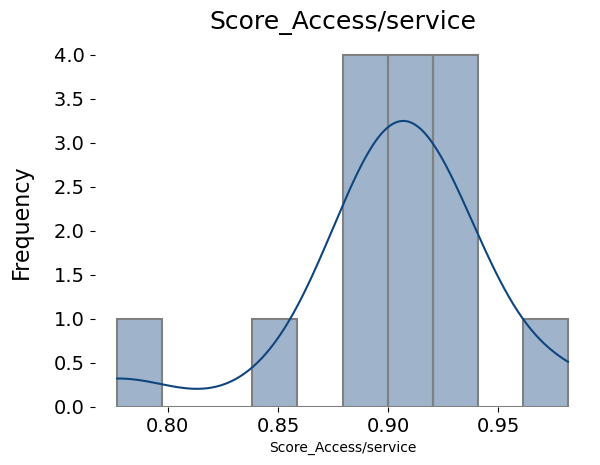

In [47]:
graph_histo(Score_acces,10)

Then , we'll explore **Nbr_channel_used** variable.

In [48]:
nbre_channel =  df_model[" Nbr_channel_used"]

In [49]:
statistics(nbre_channel)

Mean  Standard Deviation  Median  Variance
Variable                                                         
 Nbr_channel_used  2.263333            0.077086    2.28  0.005942

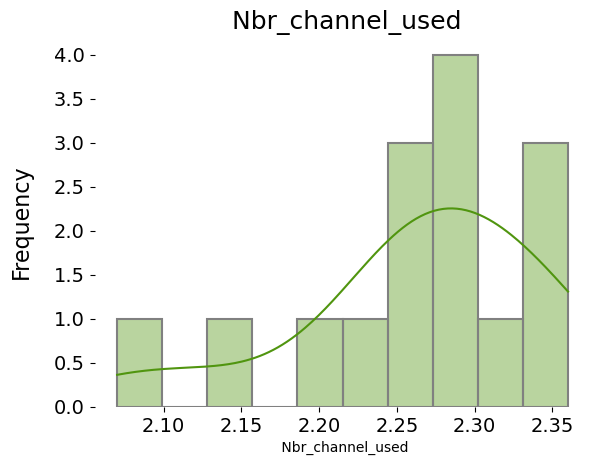

In [50]:
graph_histo(nbre_channel,10)

Then , we'll explore **total_delivery** variable.

In [51]:
delivery =  df_model["total_delivery"]

In [52]:
statistics(delivery )

Mean  Standard Deviation  Median  Variance
Variable                                                      
total_delivery  6.246667            0.352792    6.22  0.124462

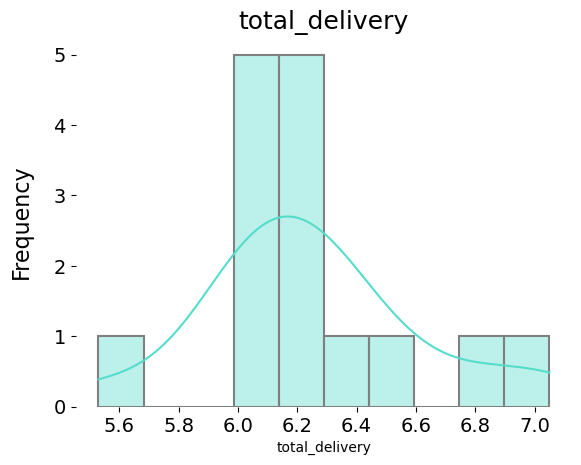

In [53]:
graph_histo(delivery ,10)

**All features are well distributed and Gaussian like**

## 2.4 Multi Variable analysis using pairplot

Also, we will analyze the correlation between the numeric parameters. For that aim, we'll use the `pairplot` seaborn function. We want to see whether there is a difference between Source/Channel. So, we are going to set the `hue` parameter to get different colors for points belonging to different Channel.

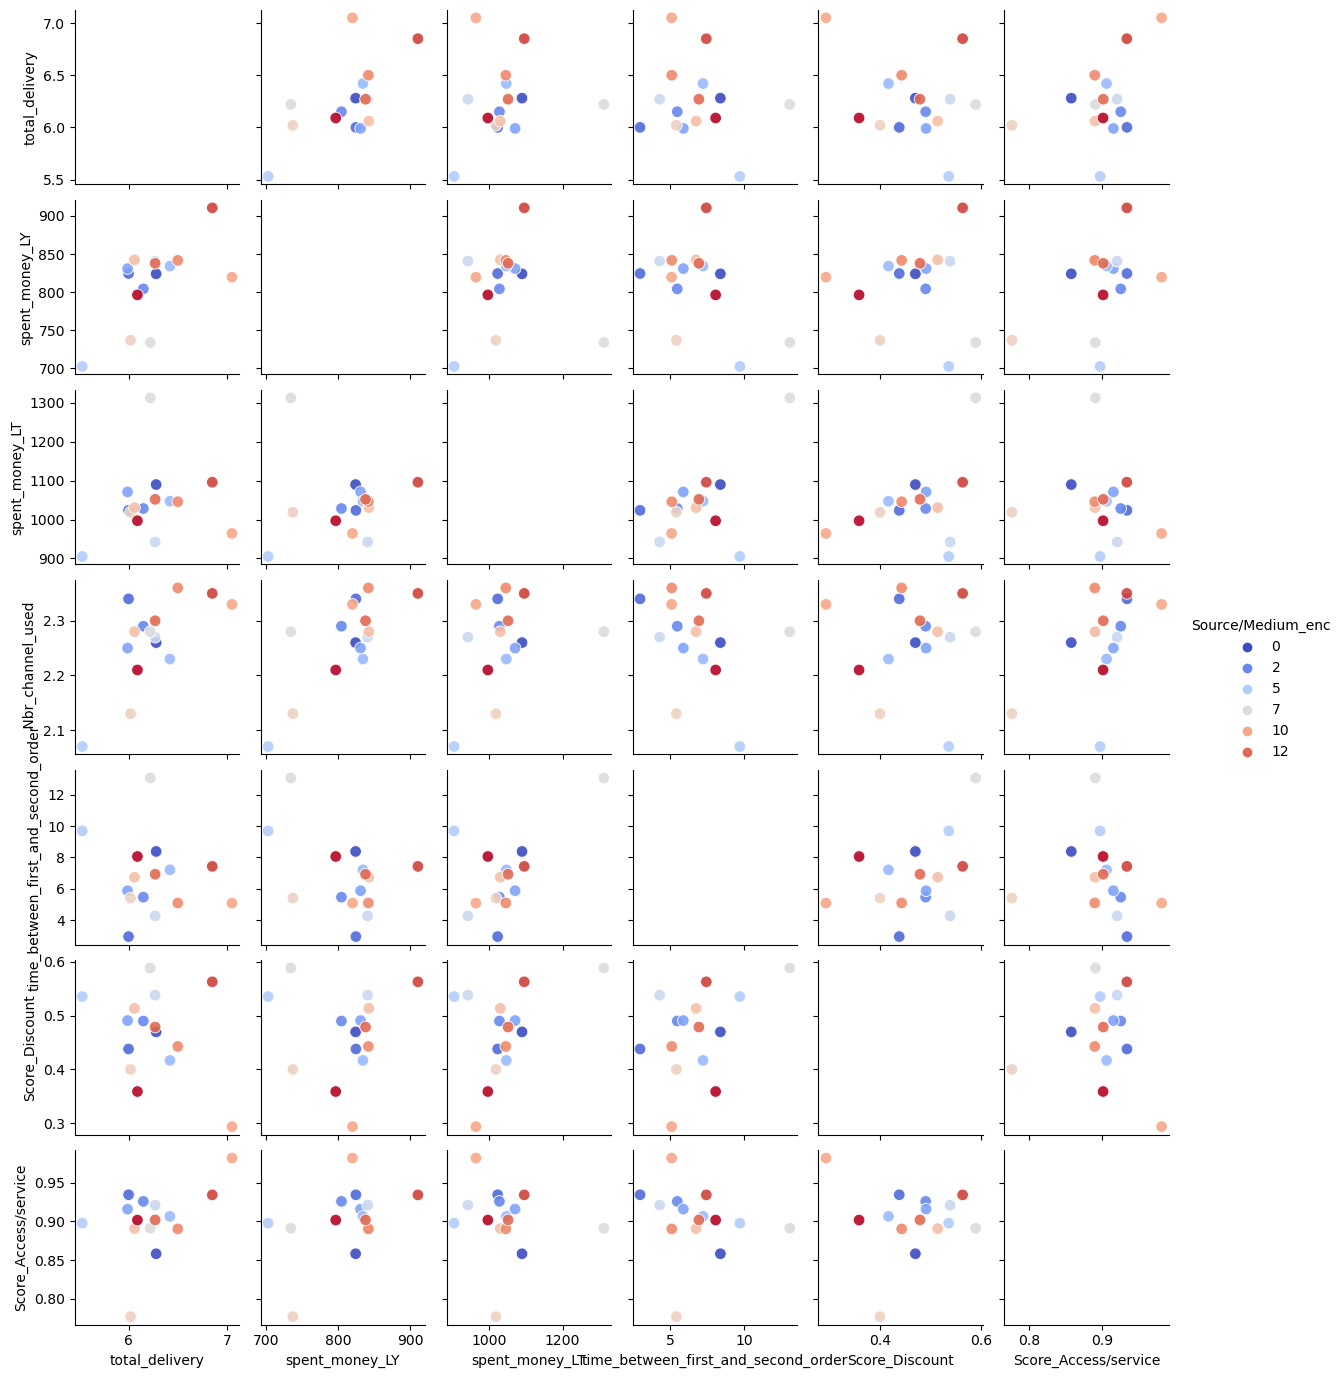

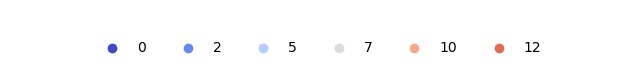

In [54]:

# Create the pairplot
g = sns.pairplot(df_model, x_vars=['total_delivery', 'spent_money_LY', 'spent_money_LT',
       'time_between_first_and_second_order', 'Score_Discount',
       'Score_Access/service'],
        hue='Source/Medium_enc', kind='scatter', palette='coolwarm',
        height=2, plot_kws={'s': 70, 'alpha': 0.9})

# Get the axes of the pairplot
axes = g.axes

# Create a new subplot for the legend box
plt.subplots(figsize=(8, 0.5))
plt.axis('off')

# Create the legend box
legend = plt.legend(handles=g._legend_data.values(), labels=g._legend_data.keys(), loc='center', ncol=len(df['Source/Medium_enc'].unique()), bbox_to_anchor=(0.5, 0), frameon=False)

# Adjust the spacing between the plots
plt.subplots_adjust(top=0.95, bottom=0.2)

# Show the plot
plt.show()


#### Droping the column "Source/Medium" before clustering as this is our target

In [55]:
df_model=df_model.drop(['Source/Medium_enc'],axis=1)

# 3. Clustering

## 3.1 KMean

In [56]:
df_model.describe().T

count         mean        std  \
total_delivery                        15.0     6.246667   0.365174   
spent_money_LY                        15.0   811.880000  52.275146   
spent_money_LT                        15.0  1041.558667  91.536446   
 Nbr_channel_used                     15.0     2.263333   0.079791   
time_between_first_and_second_order   15.0     6.779333   2.444532   
Score_Discount                        15.0     0.467852   0.078986   
Score_Access/service                  15.0     0.901810   0.044325   

                                            min          25%          50%  \
total_delivery                         5.530000     6.040000     6.220000   
spent_money_LY                       702.360000   800.195000   824.270000   
spent_money_LT                       904.970000  1007.755000  1030.630000   
 Nbr_channel_used                      2.070000     2.240000     2.280000   
time_between_first_and_second_order    2.960000     5.255000     6.740000   
Score_Discount                         0.293578     0.427352     0.478776   
Score_Access/service                   0.776991     0.890864     0.901847   

                                             75%          max  
total_delivery                          6.350000     7.050000  
spent_money_LY                        839.110000   910.430000  
spent_money_LT                       1061.410000  1312.490000  
 Nbr_channel_used                       2.315000     2.360000  
time_between_first_and_second_order     7.745000    13.060000  
Score_Discount                          0.524525     0.588559  
Score_Access/service                    0.923330     0.981651

#### Why is it important to look into the descriptive statistics, distribution and correlation between variables?

In order to apply K-means, we need to meet the algorithm assumptions. 
  
K-means assumes:

- **Cluster's shape**: The variance of the distribution is spherical meaning that clusters have a spherical shape. In order for this to be true, all variables should be normally distributed and have the same variance.
- **Clusters' Size**: All clusters have the same number of observations.
- **Relationship between variables**: There is little or no correlation between the variables.

In our dataset, our variables are normally distributed. Variances are quite close to each other. Except for Revenues that has a higer standard variation that the rest of the variables.
We could find a proper transformation to solve this issue.**We will apply a Min Max Sclaer to normalize the data** since we want to center the data around 0 and more importantly ensure that the features have similar variances.


### 3.1.1 Looking for the number of cluster using the Elbow Method with WCSS (Within-Cluster Sum of Square)

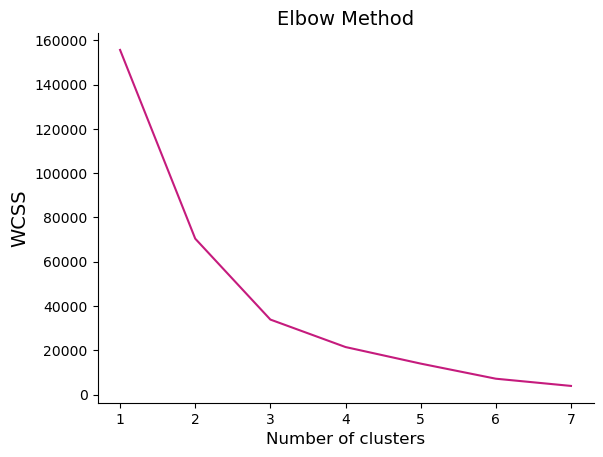

In [57]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": 'k-means++',
"n_init": 10,
"random_state": 1,
}
wcss = []
for i in range(1,8):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_model)
    wcss.append(km.inertia_)
plt.plot(range(1,8),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('WCSS', size=14)
plt.show() 

 For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. 
 **Looking at the Elbow line, it seems that there should be 2 or 3 clusters**
 

### 3.1.2 Looking for the number of cluster using the Elbow Method with Inertia method

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

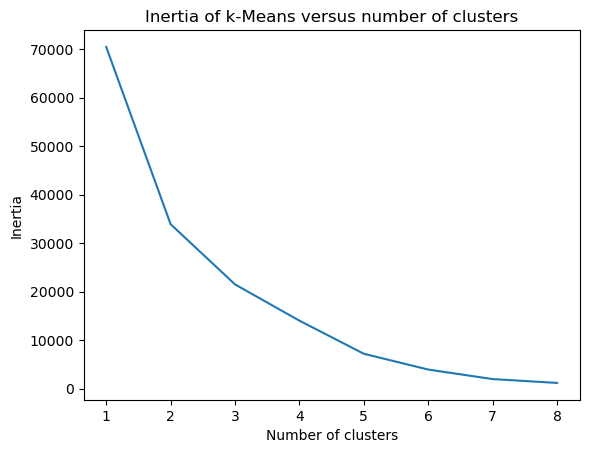

In [58]:
scores = [KMeans(n_clusters=i+2,**kmeans_kwargs).fit(df_model).inertia_ for i in range(8)]
sns.lineplot(x=np.arange(1, 9), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")


**Here this is indicated more 2 Clusters**

### We will use 2  clusters for the next calculations

In [59]:
kmeans = KMeans(n_clusters=2,**kmeans_kwargs)
kmeans.fit(df_model)

KMeans(n_clusters=2, n_init=10, random_state=1)

## 3.2 KMean Normalized

Text(0.5, 1.0, 'Inertia of Cosine k-Means versus number of clusters')

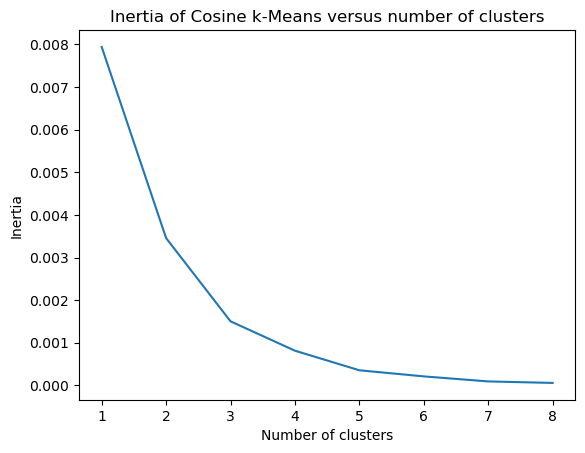

In [60]:
normalized_vectors = preprocessing.normalize(df_model)
scores = [KMeans(n_clusters=i+2, **kmeans_kwargs).fit(normalized_vectors).inertia_ for i in range(8)]
sns.lineplot(x=np.arange(1, 9), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

**So clearly it is more looking towards 2 or 3 Clusters**

# 4. Visualization

## 4.1 Visualization with 2 clusters

In [61]:
normalized_kmeans = KMeans(n_clusters=2,**kmeans_kwargs)
normalized_kmeans.fit(normalized_vectors)

KMeans(n_clusters=2, n_init=10, random_state=1)

### 4.1.1 PCA

<AxesSubplot: xlabel='x', ylabel='y'>

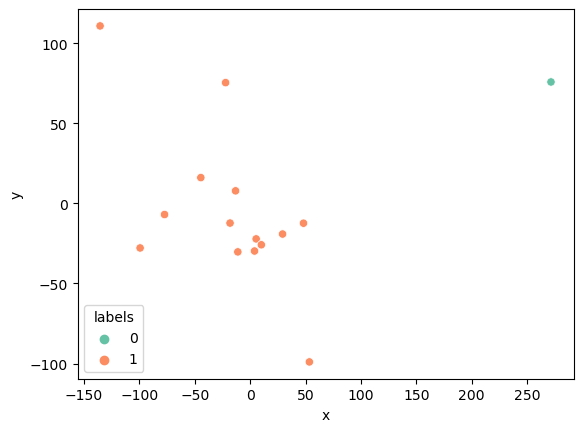

In [62]:
pca_df = prepare_pca(3, df_model, normalized_kmeans.labels_)
sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.labels, palette="Set2")

**Using 2 Cliusters won't help us as it is regrouping 14 out of the 15 channels in cluster 0 leaving only one channel in cluster 1**

### 4.1.2 t-SNE( t-Distributed Stochastic Neighbor Embedding) 

(t-SNE) is a popular technique for visualizing high-dimensional data in a lower-dimensional space, typically two or three dimensions.

In [63]:
tsne_3d_df = prepare_tsne(3, df_model, kmeans.labels_)

In [64]:
tsne_3d_df['normalized_kmeans'] = normalized_kmeans.labels_
plot_3d(tsne_3d_df, name='normalized_kmeans')

## 4.2 Visualisation with 3 clusters

In [65]:
kmeans = KMeans(n_clusters=3,**kmeans_kwargs)
kmeans.fit(df_model)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [66]:
normalized_kmeans = KMeans(n_clusters=3,**kmeans_kwargs)
normalized_kmeans.fit(normalized_vectors)

KMeans(n_clusters=3, n_init=10, random_state=1)

### 4.2.1 PCA

<AxesSubplot: xlabel='x', ylabel='y'>

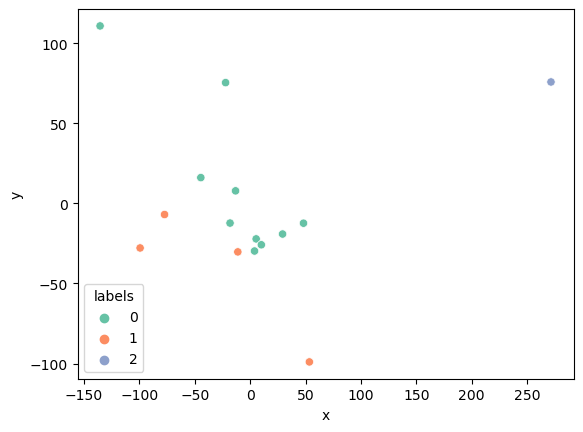

In [67]:
pca_df = prepare_pca(3, df_model, normalized_kmeans.labels_)
sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.labels, palette="Set2")

In [68]:
pca_df = prepare_pca(3, df_model, normalized_kmeans.labels_)
plot_3d(pca_df)

### 4.2.2 t-SNE( t-Distributed Stochastic Neighbor Embedding)

(t-SNE) is a popular technique for visualizing high-dimensional data in a lower-dimensional space, typically two or three dimensions.

In [69]:
tsne_3d_df = prepare_tsne(3, df_model, kmeans.labels_)

In [70]:
tsne_3d_df['normalized_kmeans'] = normalized_kmeans.labels_
plot_3d(tsne_3d_df, name='normalized_kmeans')

In [71]:
kmeans = KMeans(n_clusters=5,**kmeans_kwargs)
kmeans.fit(df_model)

KMeans(n_clusters=5, n_init=10, random_state=1)

In [72]:
normalized_kmeans = KMeans(n_clusters=5,**kmeans_kwargs)
normalized_kmeans.fit(normalized_vectors)

KMeans(n_clusters=5, n_init=10, random_state=1)

<AxesSubplot: xlabel='x', ylabel='y'>

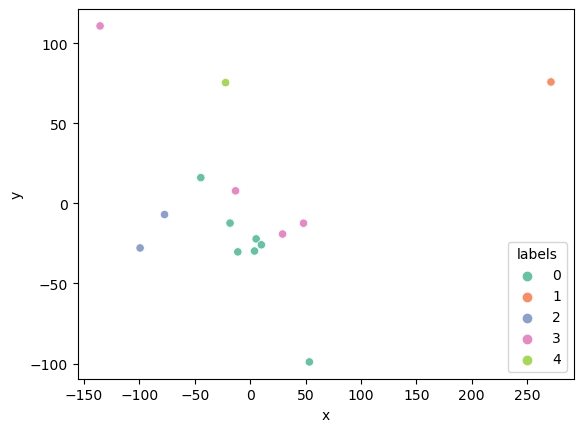

In [73]:
pca_df = prepare_pca(3, df_model, normalized_kmeans.labels_)
sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.labels, palette="Set2")

# 5. Evaluation using Silhouette Score

### 5.1 With 2 Clusters

In [74]:
kmeans = KMeans(n_clusters=2,**kmeans_kwargs).fit(df_model)

normalized_vectors = preprocessing.normalize(df_model)
normalized_kmeans = KMeans(n_clusters=2,**kmeans_kwargs).fit(normalized_vectors)


In [75]:
print('kmeans: {}'.format(silhouette_score(df_model, kmeans.labels_, metric='euclidean')))
print('Cosine kmeans: {}'.format(silhouette_score(normalized_vectors, normalized_kmeans.labels_, metric='cosine')))


kmeans: 0.6683532917794127
Cosine kmeans: 0.8866561447620958


### 5.2 With 3 Clusters

In [76]:
kmeans = KMeans(n_clusters=3,**kmeans_kwargs).fit(df_model)

normalized_vectors = preprocessing.normalize(df_model)
normalized_kmeans = KMeans(n_clusters=3,**kmeans_kwargs).fit(normalized_vectors)
print('kmeans: {}'.format(silhouette_score(df_model, kmeans.labels_, metric='euclidean')))
print('Cosine kmeans: {}'.format(silhouette_score(normalized_vectors, normalized_kmeans.labels_, metric='cosine')))

kmeans: 0.413574761665156
Cosine kmeans: 0.6047511844265853


### 5.3 With 5 Clusters

In [77]:
kmeans = KMeans(n_clusters=5,**kmeans_kwargs).fit(df_model)

normalized_vectors = preprocessing.normalize(df_model)
normalized_kmeans = KMeans(n_clusters=5,**kmeans_kwargs).fit(normalized_vectors)
print('kmeans: {}'.format(silhouette_score(df_model, kmeans.labels_, metric='euclidean')))
print('Cosine kmeans: {}'.format(silhouette_score(normalized_vectors, normalized_kmeans.labels_, metric='cosine')))

kmeans: 0.3318355000802021
Cosine kmeans: 0.5886598898666979


**The Silhouette scores being close to 1 demontrate that clusters are well separated**
- We will focus mainly  on 2 and 3 clusters
- We will also use **Cosine Kmean_Labels** in our calculations

# 6. What makes a Cluster  Unique using 2 Clusters ?

In [78]:
kmeans = KMeans(n_clusters=2,**kmeans_kwargs).fit(df_model)

normalized_vectors = preprocessing.normalize(df_model)
normalized_kmeans = KMeans(n_clusters=2,**kmeans_kwargs).fit(normalized_vectors)

In [79]:
# Setting all variables between 0 and 1 in order to better visualize the results
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model))
df_scaled.columns = df_model.columns
df_scaled['Kmeans'] = normalized_kmeans.labels_

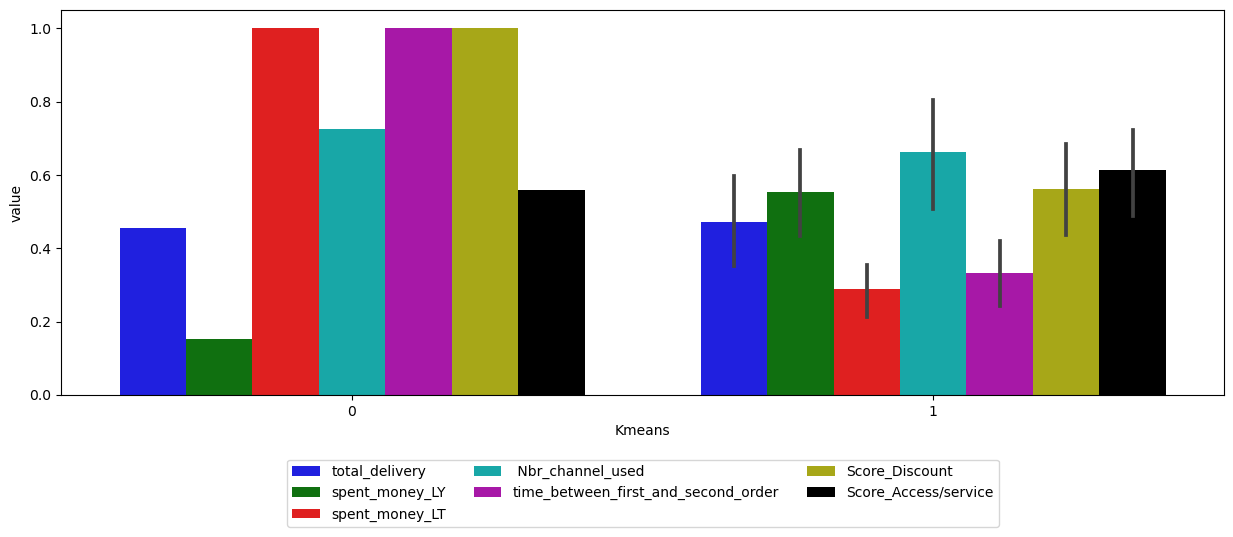

In [80]:
# Plot data
my_palette = {'total_delivery': 'b',
              'spent_money_LY': 'g', 
                 'spent_money_LT': 'r', 
                 ' Nbr_channel_used': 'c', 
                 'time_between_first_and_second_order': 'm', 
                 'Score_Discount': 'y', 
                 'Score_Access/service': 'k'}


df['Kmeans'] = normalized_kmeans.labels_
tidy = df_scaled.melt(id_vars='Kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Kmeans', y='value', hue='variable', data=tidy, palette=my_palette)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
# plt.savefig("mess.jpg", dpi=300)
plt.savefig("Kmean_mess.jpg", dpi=300)

The problem with this approach is that we simply have too many variables. Not all of them are likely to be important when creating the clusters. Instead, I will select the most important columns based on the following approach:

## 6.1 Variance

In [81]:
df_mean = df_scaled.loc[df_scaled.Kmeans!=-1, :].groupby('Kmeans').mean().reset_index()

In [82]:
df_mean

Kmeans  total_delivery  spent_money_LY  spent_money_LT   Nbr_channel_used  \
0       0        0.453947        0.151199        1.000000           0.724138   
1       1        0.472744        0.553159        0.287683           0.662562   

   time_between_first_and_second_order  Score_Discount  Score_Access/service  
0                             1.000000        1.000000              0.557499  
1                             0.333734        0.561569              0.613624

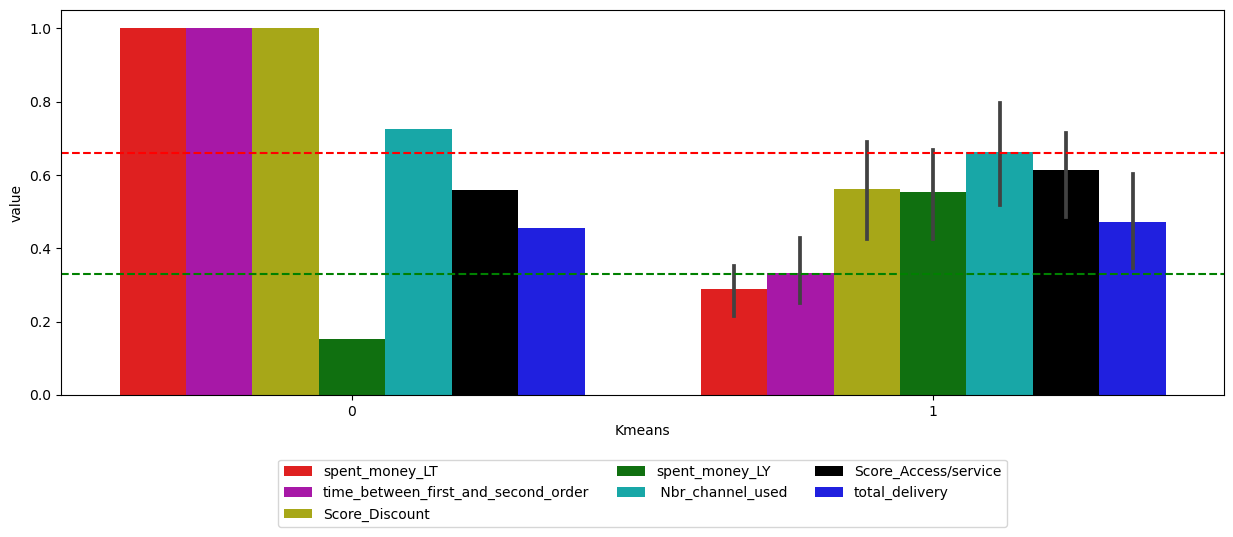

In [83]:
#Setting all variables between 0 and 1 in order to better visualize the results
# df = load_preprocess_data().drop("Churn", 1)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model))
df_scaled.columns = df_model.columns
df_scaled['Kmeans'] =normalized_kmeans.labels_

# Calculate variables with largest differences (by standard deviation)
# The higher the standard deviation in a variable based on average values for each cluster
# The more likely that the variable is important when creating the cluster
df_mean = df_scaled.loc[df_scaled.Kmeans!=-1, :].groupby('Kmeans').mean().reset_index()
results = pd.DataFrame(columns=['Variable', 'Std'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.std(df_mean[column])]
selected_columns = list(results.sort_values('Std', ascending=False).head(7).Variable.values) + ['Kmeans']

# Plot data


tidy = df_scaled[selected_columns].melt(id_vars='Kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Kmeans', y='value', hue='variable', data=tidy, palette=my_palette)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.savefig("Kmeans_results.jpg", dpi=300)
# Add horizontal lines
ax.axhline(y=0.66, color='red', linestyle='--')
ax.axhline(y=0.33, color='green', linestyle='--')

## 6.2 Feature Importance using Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
y = df_scaled.iloc[:,-1]
X = df_scaled.iloc[:,:-1]
clf = RandomForestClassifier(n_estimators=100).fit(X, y)
selected_columns = list(pd.DataFrame(np.array([clf.feature_importances_, X.columns]).T, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(7)
           .Feature
           .values)

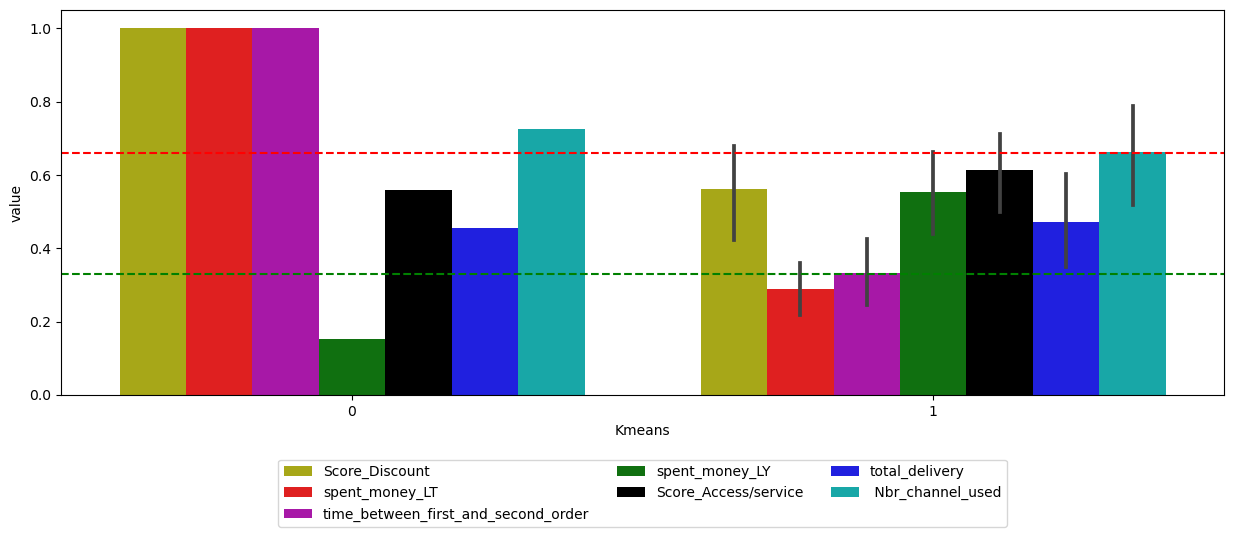

In [85]:
# Plot data

tidy = df_scaled[selected_columns+['Kmeans']].melt(id_vars='Kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Kmeans', y='value', hue='variable', data=tidy, palette=my_palette)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.savefig('randomforest.jpg', dpi=300)
# Add horizontal lines
ax.axhline(y=0.66, color='red', linestyle='--')
ax.axhline(y=0.33, color='green', linestyle='--')

# 7. Using 3 Clusters

## 7.1 Set Up 

In [86]:
kmeans = KMeans(n_clusters=3,**kmeans_kwargs).fit(df_model)

normalized_vectors = preprocessing.normalize(df_model)
normalized_kmeans = KMeans(n_clusters=3,**kmeans_kwargs).fit(normalized_vectors)


## 7.2 Normalize

In [87]:
# Setting all variables between 0 and 1 in order to better visualize the results
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model))
df_scaled.columns = df_model.columns
df_scaled['Kmeans'] = normalized_kmeans.labels_

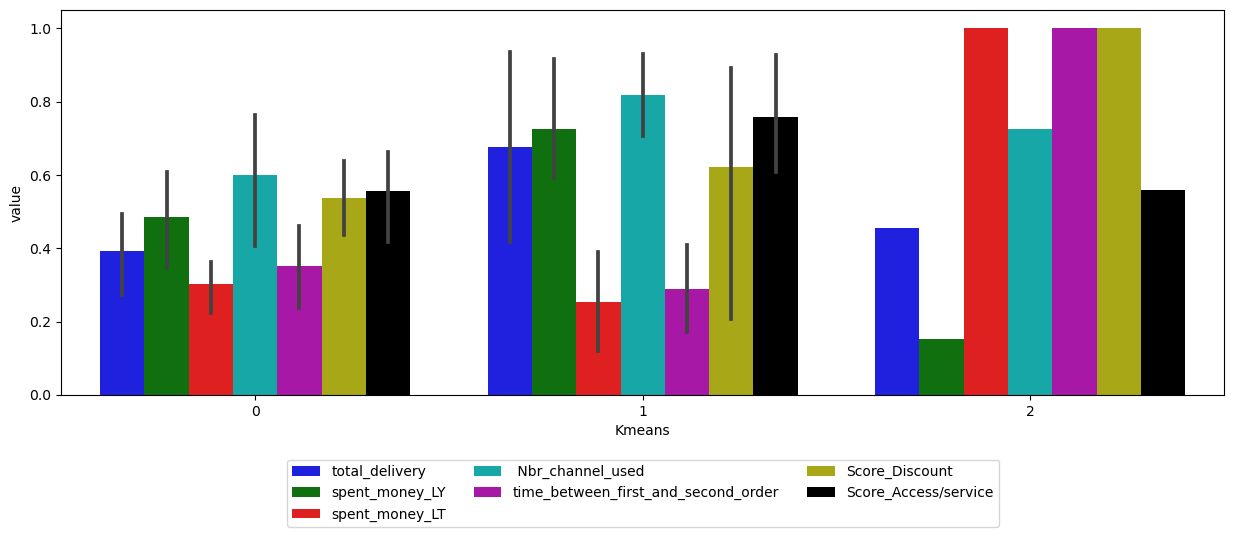

In [88]:
#Plot data



# data = load_preprocess_data()
df['Kmeans'] = normalized_kmeans.labels_
tidy = df_scaled.melt(id_vars='Kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Kmeans', y='value', hue='variable', data=tidy, palette=my_palette)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
# plt.savefig("mess.jpg", dpi=300)
plt.savefig("Kmean_mess.jpg", dpi=300)

## 7.3 Variance

In [89]:
df_mean = df_scaled.loc[df_scaled.Kmeans!=-1, :].groupby('Kmeans').mean().reset_index()

In [90]:
df_mean

Kmeans  total_delivery  spent_money_LY  spent_money_LT   Nbr_channel_used  \
0       0        0.391447        0.484452        0.301347           0.600000   
1       1        0.675987        0.724924        0.253521           0.818966   
2       2        0.453947        0.151199        1.000000           0.724138   

   time_between_first_and_second_order  Score_Discount  Score_Access/service  
0                             0.351386        0.537403              0.556444  
1                             0.289604        0.621983              0.756572  
2                             1.000000        1.000000              0.557499

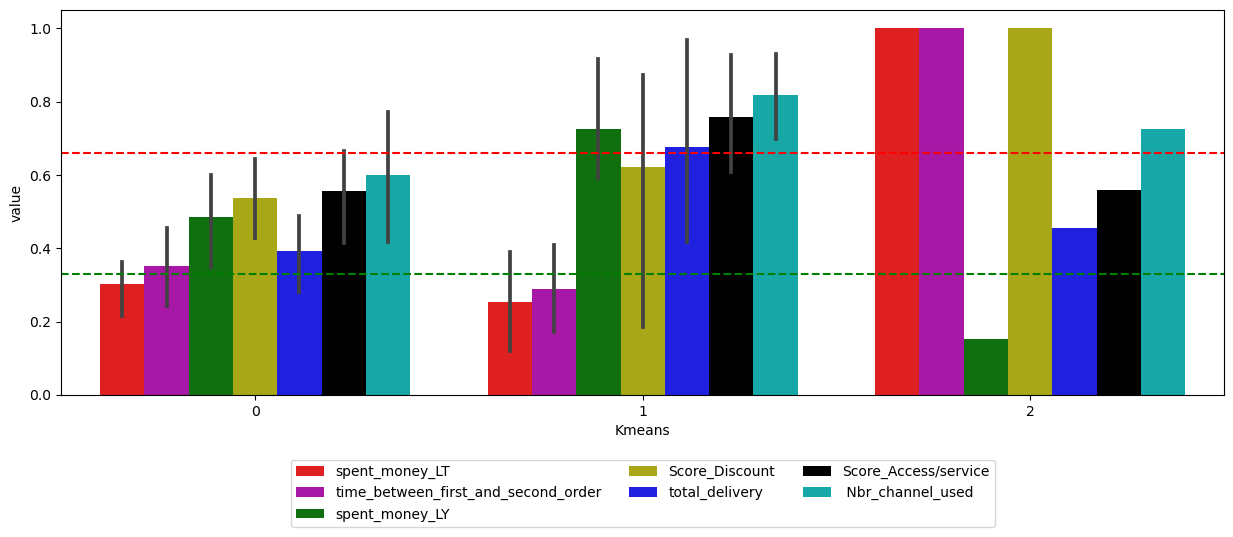

In [91]:
#Setting all variables between 0 and 1 in order to better visualize the results
# df = load_preprocess_data().drop("Churn", 1)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model))
df_scaled.columns = df_model.columns
df_scaled['Kmeans'] =normalized_kmeans.labels_

# Calculate variables with largest differences (by standard deviation)
# The higher the standard deviation in a variable based on average values for each cluster
# The more likely that the variable is important when creating the cluster
df_mean = df_scaled.loc[df_scaled.Kmeans!=-1, :].groupby('Kmeans').mean().reset_index()
results = pd.DataFrame(columns=['Variable', 'Std'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.std(df_mean[column])]
selected_columns = list(results.sort_values('Std', ascending=False).head(7).Variable.values) + ['Kmeans']

# Plot data


tidy = df_scaled[selected_columns].melt(id_vars='Kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Kmeans', y='value', hue='variable', data=tidy, palette=my_palette)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.savefig("Kmeans_results.jpg", dpi=300)
# Add horizontal lines
ax.axhline(y=0.66, color='red', linestyle='--')
ax.axhline(y=0.33, color='green', linestyle='--')

## 7.4 Feature Importance using Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
y = df_scaled.iloc[:,-1]
X = df_scaled.iloc[:,:-1]
clf = RandomForestClassifier(n_estimators=100).fit(X, y)
selected_columns = list(pd.DataFrame(np.array([clf.feature_importances_, X.columns]).T, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(7)
           .Feature
           .values)

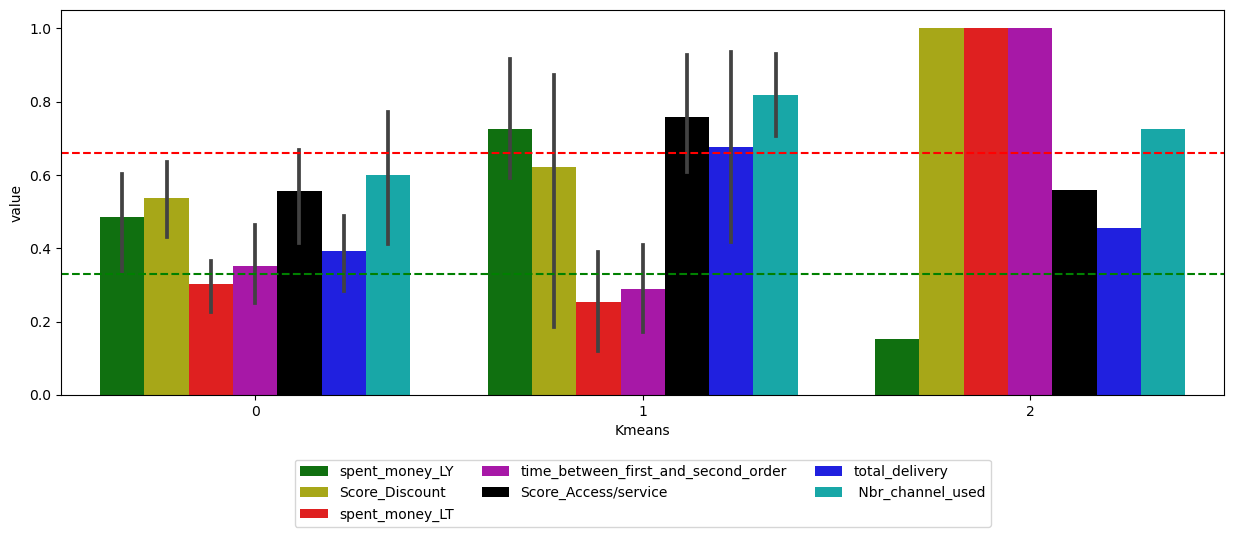

In [93]:
# Plot data

tidy = df_scaled[selected_columns+['Kmeans']].melt(id_vars='Kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Kmeans', y='value', hue='variable', data=tidy, palette=my_palette)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.savefig('randomforest.jpg', dpi=300)
# Add horizontal lines
ax.axhline(y=0.66, color='red', linestyle='--')
ax.axhline(y=0.33, color='green', linestyle='--')

# 8. Conclusion

In [94]:
# Moving the feature Kmeans close to the column "Source/Medium"
df.insert(1, "Kmeans", df.pop("Kmeans"))

In [95]:
df

Source/Medium  Kmeans  Nbre_Transac_by_Cust  \
0             (direct) / (none)       0                  1.04   
1              Ecosia / organic       0                  1.02   
2                    bing / cpc       0                  1.03   
3                bing / organic       0                  1.03   
4          comparateur / kelkoo       0                  1.01   
5              criteo / display       0                  1.00   
6      customer.io / behavioral       1                  1.01   
7      customer.io / newsletter       2                  1.02   
8   customer.io / transactional       0                  1.02   
9          effinity / affiliate       1                  1.04   
10               facebook / cpa       1                  1.00   
11                 google / cpc       0                  1.05   
12             google / organic       0                  1.03   
13        lemonde.fr / referral       1                  1.00   
14        radins.com / referral       0                  1.01   

    total_discounts  total_delivery  num_transactions_LY  spent_money_LY  \
0             12.94            6.28                 2.32          823.88   
1             13.14            6.00                 2.36          824.27   
2             13.97            6.15                 2.31          804.16   
3             14.40            5.99                 2.26          830.76   
4             11.37            6.42                 2.29          834.04   
5             14.01            5.53                 2.10          702.36   
6             14.43            6.27                 2.32          840.56   
7             16.71            6.22                 2.33          733.82   
8             11.40            6.02                 2.21          736.67   
9             14.06            6.06                 2.32          842.29   
10             8.03            7.05                 2.40          819.50   
11            12.93            6.50                 2.41          841.57   
12            13.53            6.27                 2.34          837.66   
13            17.24            6.85                 2.41          910.43   
14             9.81            6.09                 2.23          796.23   

    num_transactions_LT  spent_money_LT   Nbr_channel_used  \
0                  3.35         1089.78               2.26   
1                  3.19         1023.51               2.34   
2                  3.19         1028.29               2.29   
3                  3.19         1070.98               2.25   
4                  3.12         1047.12               2.23   
5                  2.94          904.97               2.07   
6                  2.74          942.39               2.27   
7                  4.65         1312.49               2.28   
8                  3.28         1018.71               2.13   
9                  2.99         1030.63               2.28   
10                 2.94          964.28               2.33   
11                 3.19         1045.75               2.36   
12                 3.16         1051.84               2.30   
13                 3.11         1095.84               2.35   
14                 3.01          996.80               2.21   

    time_between_first_and_second_order  has_discount  \
0                                  8.38          1808   
1                                  2.96            60   
2                                  5.47           957   
3                                  5.88           134   
4                                  7.21           423   
5                                  9.69            68   
6                                  4.28           381   
7                                 13.06           535   
8                                  5.41           226   
9                                  6.74          2414   
10                                 5.09            32   
11                                 5.10          9580   
12                        

In [96]:
# Mean by cluster and feature
group = df.groupby('Kmeans').mean()
round(group.T,2)

Kmeans                                           0        1        2
Nbre_Transac_by_Cust                          1.02     1.01     1.02
total_discounts                              12.75    13.44    16.71
total_delivery                                6.12     6.56     6.22
num_transactions_LY                           2.28     2.36     2.33
spent_money_LY                              803.16   853.20   733.82
num_transactions_LT                           3.16     2.94     4.65
spent_money_LT                             1027.78  1008.29  1312.49
 Nbr_channel_used                             2.24     2.31     2.28
time_between_first_and_second_order           6.51     5.88    13.06
has_discount                               1684.80   730.25   535.00
Multi Purchased with Accessories/Services  3311.80  1275.25   810.00
Nbre_Transac                               3720.00  1421.00   909.00
Score_Discount                                0.45     0.48     0.59
Score_Access/service                          0.89     0.93     0.89
Source/Medium_enc                             6.00     9.50     7.00

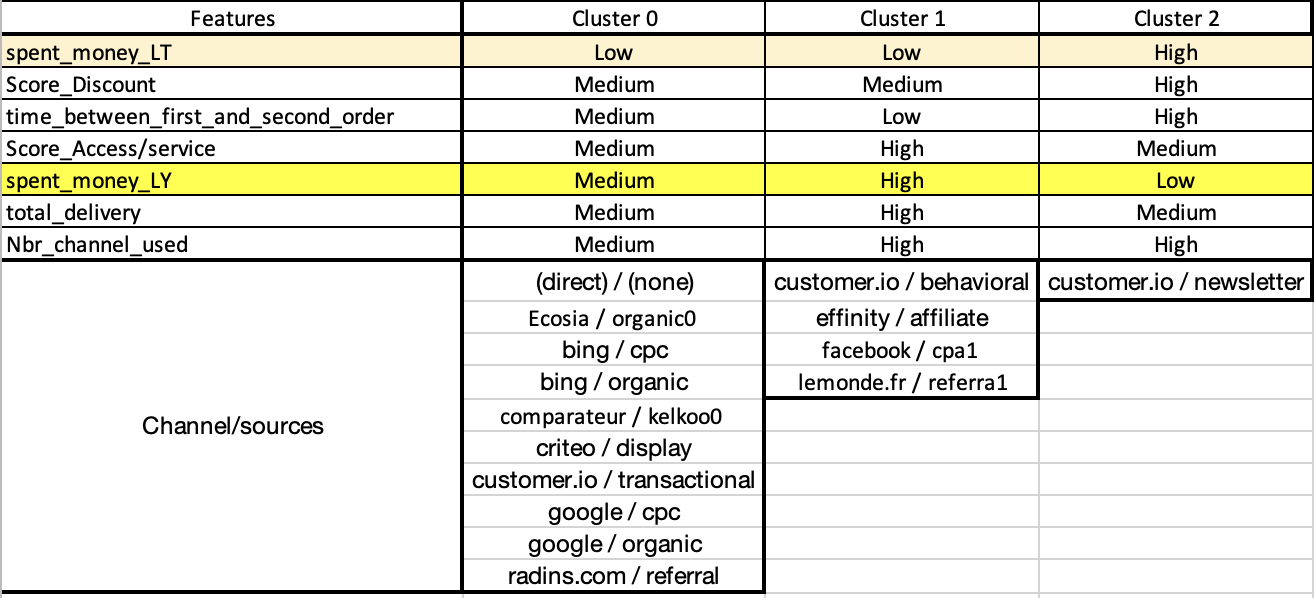

## 8.1 Here are the characteristics of the channels

1. **Cluster 0** is composed of the majority of the Channel/Sources :
- 10 channels out of 15 representing most of the customer transaction and spendings
- The average number of transactions for LY was 3420 or 61% of the averge transaction LY
- The revenue by customer as been progressing from Low contribution from Long Term Sales(LT) to Medium contribution Last Year (LY).
- This cluster very well represents the core business of Certideal with balanced contribution of every feature set as Medium contribution
- It looks to be more a direct/oneshot type of purchases.

2. **Cluster 1**  is composed of  of the Channel/Sources  largely coming from social network or referal/behaviours type of purchase with a short delay from the 1st and 2nd purchase. 
- The average number of transactions for LY was 1421 or 24% of the averge transaction LY
- The revenue by customer as been progressing very much from Low contribution from Long Term Sales(LT) to high contribution Last Year (LY).
- The average Delivery cost are usually higher than the other cluster due to Facebook and Lemonde.fr high contribution in that feature.
- It is also a cluster where the customer tend to use more different channel than average to purchase at Certideal.

3. **Cluster 2** is only composed by one Source/Channel "Customer.io" via newsletter medium so using a specific marketing push pull srategy.
- The average number of transactions for LY was 909 or 15% of the averge transaction LY
- We observe that this channel who was highly contributing to High Revenue LT , has dropped significantly in LY revenue compared to the other channels , despite being the channel where discounts contributes the lost.
- Being an entry door to Certideal , this channel is also highly contributing to high numbers of channel sued for purchase by customers

## 8.2 Additional Analysis of Channel "None/Direct" retention

This is % wise analysis of channels used by users before switching to the channel 'direct/none' 
basically if a user used google/cpc first then direct/none will be the second 

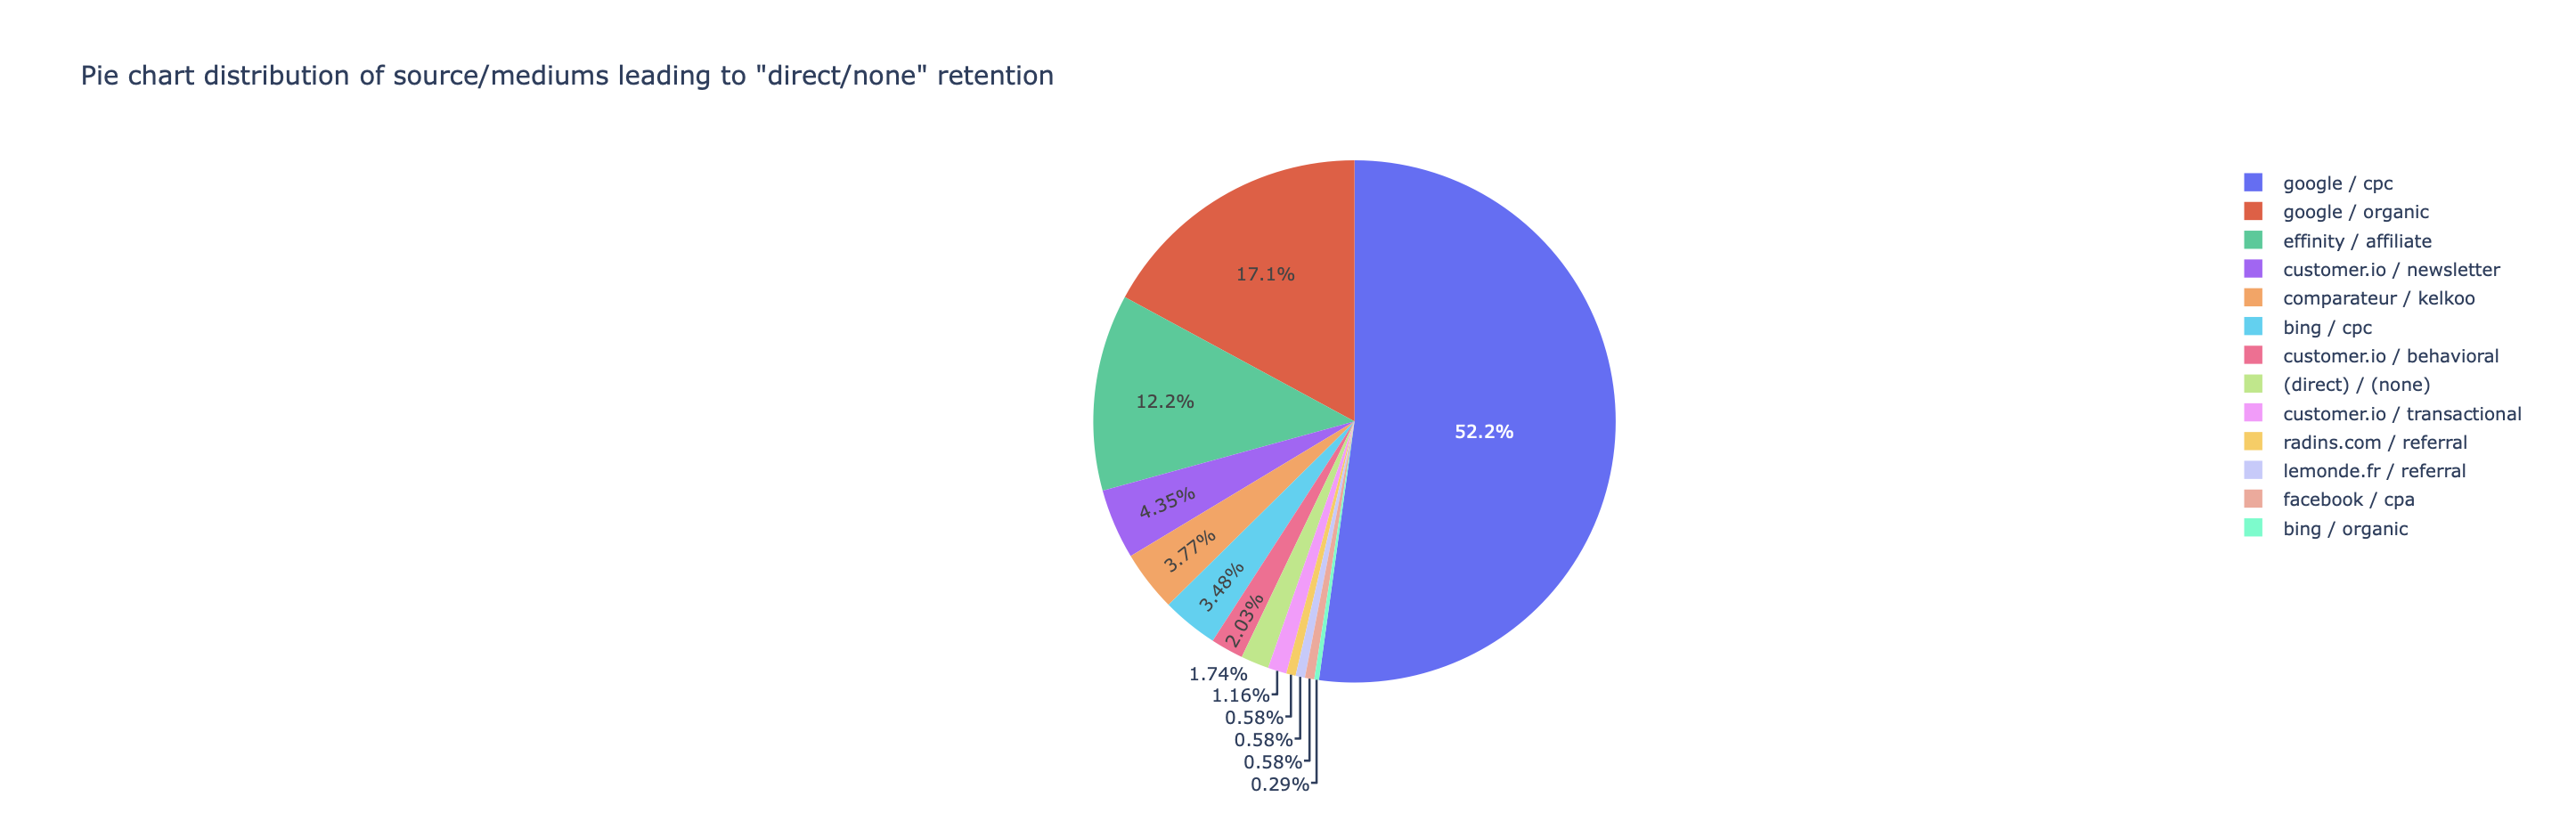

Same Idea hear but here this is the channel the user will use after havnig purchased via 'Direct/None'

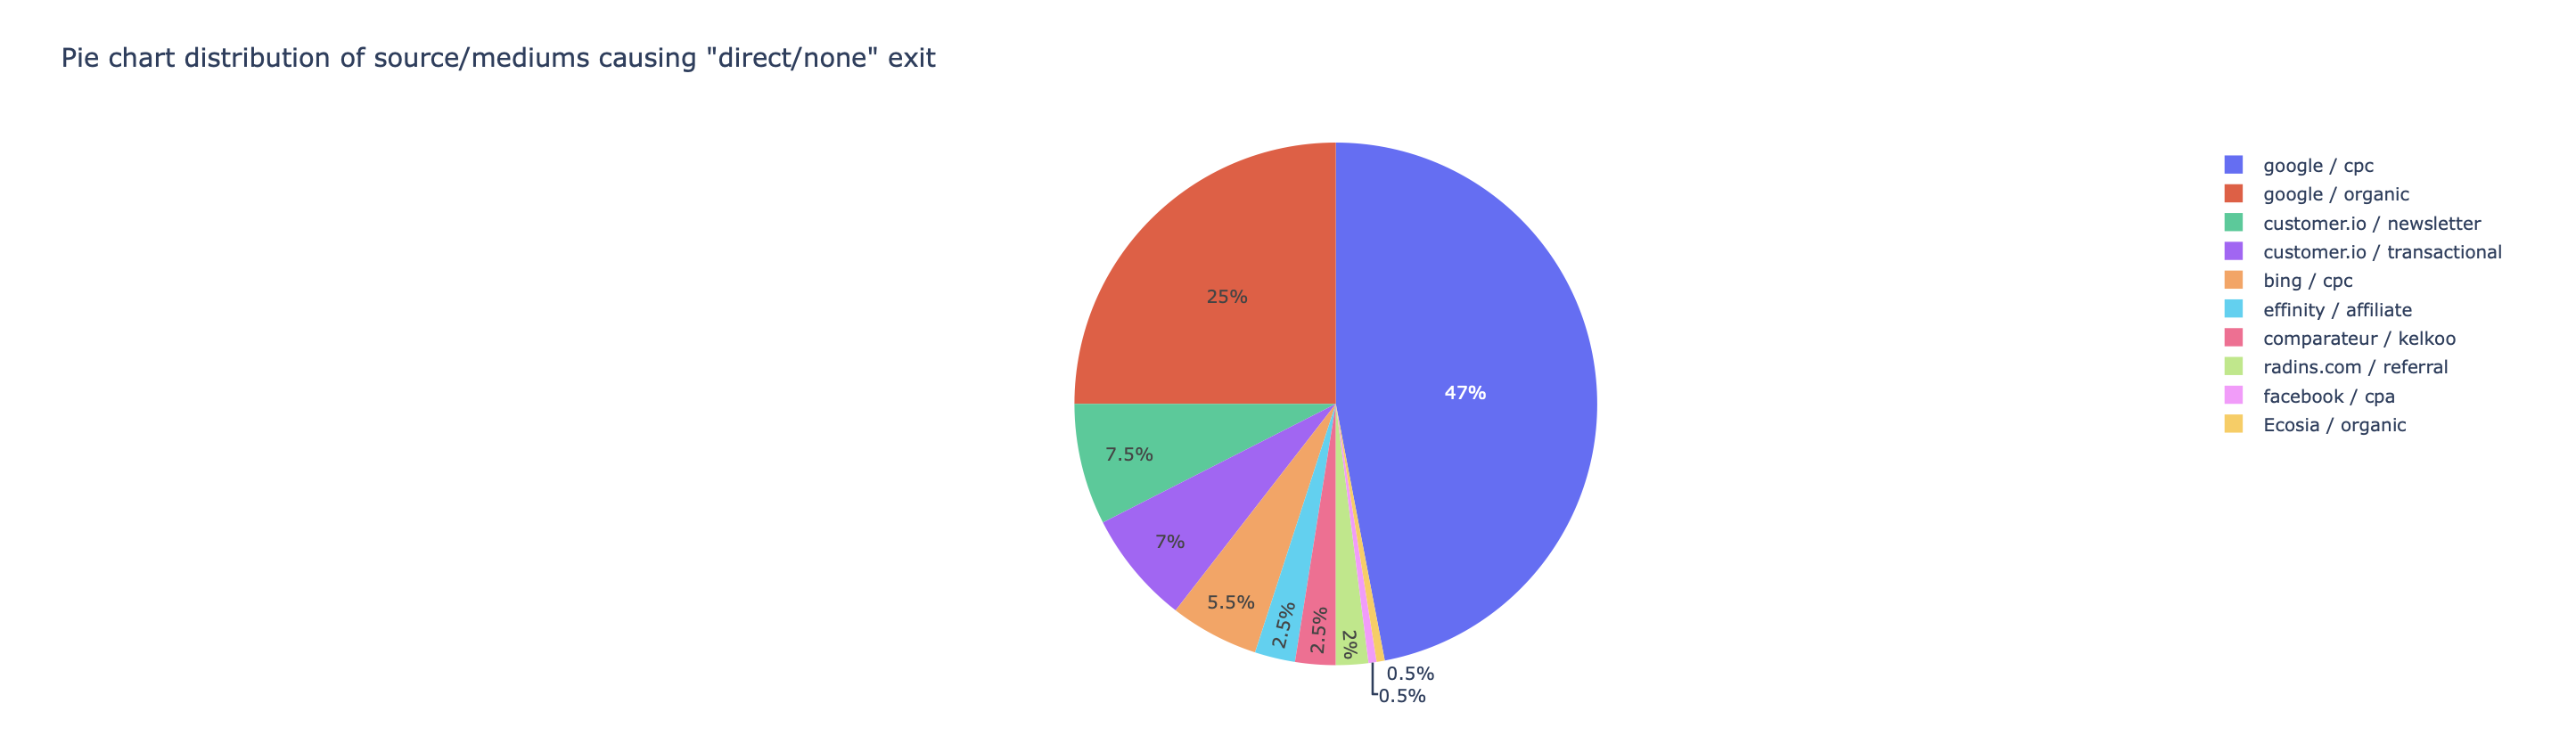